# **This notebook contains the following for the Kaggle problem titled 'Titanic - Machine Learning from Disaster'**
> ### 1. Exploratory Data Analysis
> ### 2. Feature Engineering




### **Original Problem Statement**: To create a machine learning model for predicting the passengers that survived the Titanic shipwreck.

### **Problem Statement for this notebook**: To carry out the exploratory data analysis and feature engineering on the data.

In [1]:
!pip install category_encoders
!pip install matplotlib --upgrade
!pip install seaborn --upgrade

# Restart runtime after this

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## **1] Exploratory Data Analysis (EDA)**

---

General Steps:
1.   Data Collection
2.   Univariate Analysis   
3.   Data Cleaning
4.   Bivariate Analysis




### **EDA1 - Data Collection**

---

Making sure that the data collected is from a reliable source (Kaggle in this case)

1. Load the data
2. Print the number of rows and columns 
3. Print the columns' titles
4. Print the columns' datatypes 

The explanation of the dataset is given [here](https://www.kaggle.com/competitions/titanic/data). A csv file titled **train.csv** is used for the purpose of this notebook.

#### Loading the data

In [3]:
# Add an extra argument 'header=None' if the csv file does not have any header
# Check what the separator is from ';' or ',' Here it is ';'

pd.set_option('display.max_columns', None, 'display.max_rows', None, 'display.expand_frame_repr', None)

dataset = pd.read_csv('train.csv')
df = dataset.copy()
print(df.head())

   PassengerId  Survived  Pclass                                               Name     Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked
0            1         0       3                            Braund, Mr. Owen Harris    male  22.0      1      0         A/5 21171   7.2500   NaN        S
1            2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1      0          PC 17599  71.2833   C85        C
2            3         1       3                             Heikkinen, Miss. Laina  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S
3            4         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0            113803  53.1000  C123        S
4            5         0       3                           Allen, Mr. William Henry    male  35.0      0      0            373450   8.0500   NaN        S


#### Checking the number of rows (entries) and columns (features/attributes) in the dataset

In [4]:
print(f'Number of entries in the dataset: {df.shape[0]}')
print(f'Number of columns in the dataset: {df.shape[1]}')

Number of entries in the dataset: 891
Number of columns in the dataset: 12


#### Printing the columns' titles

In [5]:
# Printing the attributes
list_attr = list(df.columns)
print('\nThe attributes of the dataset are as follows: ')
for attr in list_attr:
  print(f'\t {list_attr.index(attr)}: {attr}')


The attributes of the dataset are as follows: 
	 0: PassengerId
	 1: Survived
	 2: Pclass
	 3: Name
	 4: Sex
	 5: Age
	 6: SibSp
	 7: Parch
	 8: Ticket
	 9: Fare
	 10: Cabin
	 11: Embarked


#### Printing the columns' datatypes

In [6]:
col_datatypes = df.info(null_counts=0)
print(col_datatypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Dtype  
---  ------       -----  
 0   PassengerId  int64  
 1   Survived     int64  
 2   Pclass       int64  
 3   Name         object 
 4   Sex          object 
 5   Age          float64
 6   SibSp        int64  
 7   Parch        int64  
 8   Ticket       object 
 9   Fare         float64
 10  Cabin        object 
 11  Embarked     object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


<ipython-input-6-082cc45ea25f>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  col_datatypes = df.info(null_counts=0)


### **EDA2 - Univariate Analysis - 1**

---
1. Find the categorical and 'other' columns
2. Find the number of unique values
3. For categorical variables, print the unique values
4. Find the target variables' distribution
> For continuous variable, plot histogram \
  For categorical variable, plot bar graph (count plot)
5. Find the features' distributions for outliers - histograms and boxplots
>  **The distributions can have:** \
   **Positive skew or right skew** - distribution more towards the left i.e. 
   MEAN > MEDIAN > MODE \
   **Negative skew or left skew** - distribution more towards right
   MODE > MEDIAN > MEAN \
   If the skewness is \
   (-0.5, 0.5) -> nearly symmetrical. \
   (-1, -0.5] or [0.5, 1) -> slightly skewed \
   (-inf, -1] or [1, inf) -> highly skewed \
   \-------------------------------------------------------------------\
   **Three types of kurtosis:** \
   Mesokurtic - kurt = 3. Normal distribution \
   Leptokurtic - kurt > 3. Long and skinny tails. Heavy tails. Large outliers. \
   Platykurtic - kurt < 3. Flat tails. Small outliers 

#### Finding the Numerical and Categorical features
---
CAREFUL HERE! Refer to the data source before making any assumptions

From the data source, 

The target variable is: Survived

The categorical features are: Sex, Pclass, Embarked

The purely numerical features are: Age, SibSp, Parch, Fare

Other features: PassengerId, Name, Cabin, Ticket



In [7]:
target_var = 'Survived'
idx_target = list_attr.index(target_var)


numerical_features   = ['Age', 'SibSp', 'Parch', 'Fare']
categorical_features = ['Sex', 'Pclass', 'Embarked']
other_features = ['PassengerId', 'Name', 'Cabin', 'Ticket']

idx_numerical = []
idx_categorical = []
idx_other = []

for i in numerical_features:
  idx = list_attr.index(i)
  idx_numerical.append(idx)

for i in categorical_features:
  idx = list_attr.index(i)
  idx_categorical.append(idx)

for i in other_features:
  idx = list_attr.index(i)
  idx_other.append(idx)

print(f'List of features: {numerical_features+categorical_features+other_features}')
print('\n')
print(f'Numerical attributes: {numerical_features}')
print(f'Indices of numerical attributes: {idx_numerical}')
print('\n')
print(f'Categorical attributes: {categorical_features}')
print(f'Indices of categorical attributes: {idx_categorical}')
print('\n')
print(f'Other attributes: {other_features}')
print(f'Indices of other attributes: {idx_other}')
print('\n')
print(f'Target variable: {target_var}')
print(f'Index of target variable: {idx_target}')


List of features: ['Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Pclass', 'Embarked', 'PassengerId', 'Name', 'Cabin', 'Ticket']


Numerical attributes: ['Age', 'SibSp', 'Parch', 'Fare']
Indices of numerical attributes: [5, 6, 7, 9]


Categorical attributes: ['Sex', 'Pclass', 'Embarked']
Indices of categorical attributes: [4, 2, 11]


Other attributes: ['PassengerId', 'Name', 'Cabin', 'Ticket']
Indices of other attributes: [0, 3, 10, 8]


Target variable: Survived
Index of target variable: 1


#### Finding the number of unique values in each column 


In [8]:
# For categorical variables, printing the unique values
print('The number unique values for the numerical features: ')
print(df.nunique().drop(categorical_features).drop(other_features))
print('\n')
print('##############################################################')
print('The number unique values for the categorical features: ')
print(df.nunique().drop(numerical_features).drop(other_features))
print('\n')
print('##############################################################')
print('The number unique values for the other features: ')
print(df.nunique().drop(numerical_features).drop(categorical_features))

The number unique values for the numerical features: 
Survived      2
Age          88
SibSp         7
Parch         7
Fare        248
dtype: int64


##############################################################
The number unique values for the categorical features: 
Survived    2
Pclass      3
Sex         2
Embarked    3
dtype: int64


##############################################################
The number unique values for the other features: 
PassengerId    891
Survived         2
Name           891
Ticket         681
Cabin          147
dtype: int64


#### Printing the unique values of categorical columns

In [9]:
print('\nThe unique values for the categories are: ')
for i in categorical_features:
  print(f'{i}: {df[i].unique()}')


The unique values for the categories are: 
Sex: ['male' 'female']
Pclass: [3 1 2]
Embarked: ['S' 'C' 'Q' nan]


#### Finding the target variable's distribution

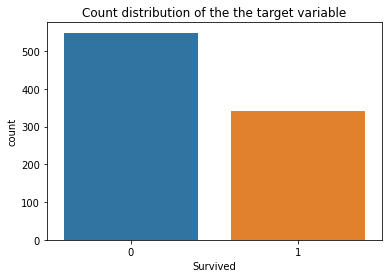

In [10]:
# Checking the target variables distribution

# If continuous - histogram

# plt.figure()
# sns.displot(df[target_var], bins=30).set(title='Histogram of the target variable')
# print('\n')
# plt.figure()
# sns.displot(df[target_var], kind='kde').set(title='Density')
# plt.show()

# If categorical - bar graph for count
plt.figure() 
sns.countplot(x=target_var, data=df).set(title='Count distribution of the the target variable')
plt.show()

#### Finding the features' distributions

<Figure size 432x288 with 0 Axes>

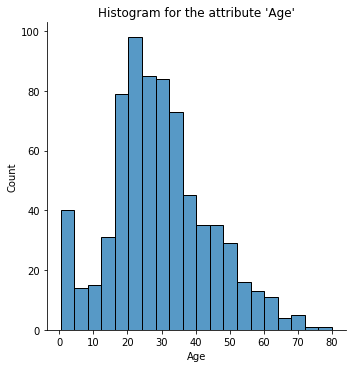

Skewness: 0.38910778230082704
	 The distribution is nearly symmetrical


Kurtosis: 0.17827415364210353
	 The distribution is platykurtic. Small outliers.
########################################################




<Figure size 432x288 with 0 Axes>

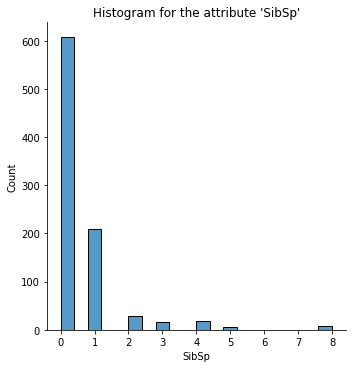

Skewness: 3.6953517271630565
	 The distribution is highly skewed towards the right


Kurtosis: 17.880419726645968
	 The distribution is leptokurtic. Large outliers.
########################################################




<Figure size 432x288 with 0 Axes>

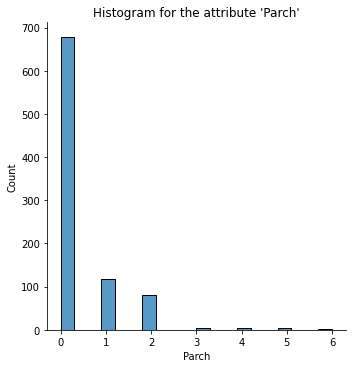

Skewness: 2.7491170471010933
	 The distribution is highly skewed towards the right


Kurtosis: 9.778125179021648
	 The distribution is leptokurtic. Large outliers.
########################################################




<Figure size 432x288 with 0 Axes>

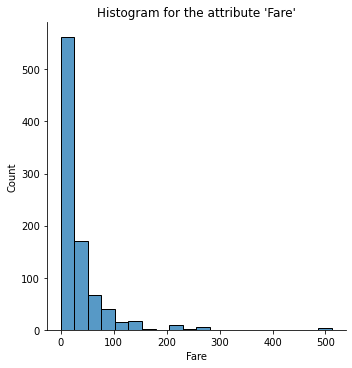

Skewness: 4.787316519674893
	 The distribution is highly skewed towards the right


Kurtosis: 33.39814088089868
	 The distribution is leptokurtic. Large outliers.
########################################################


In [11]:
# Plotting numerical variables histogram distributions
# Also printing skewness and kurtosis for them
for i in numerical_features:
  if i != target_var:
    print('\n')
    plt.figure()
    sns.displot(df[i], bins=20).set(title=f'Histogram for the attribute \'{i}\'')
    plt.show()
    skew = df[i].skew()
    kurt = df[i].kurt()
    print(f'Skewness: {skew}')
    if skew > 0:
      dir = 'right'
    else:
      dir = 'left'
    if skew > -0.5 and skew < 0.5:
      print('\t The distribution is nearly symmetrical')
    elif (skew > -1 and skew <= -0.5) or (skew >= 0.5 and skew < 1):
      print(f'\t The distribution is slightly skewed towards the {dir}')
    else:
      print(f'\t The distribution is highly skewed towards the {dir}')
    print('\n')
    print(f'Kurtosis: {kurt}')
    if kurt == 3:
      print('\t The distribution is mesokurtic - normal')
    elif kurt > 3:
      print('\t The distribution is leptokurtic. Large outliers.')
    else:
      print('\t The distribution is platykurtic. Small outliers.')
    print('########################################################')


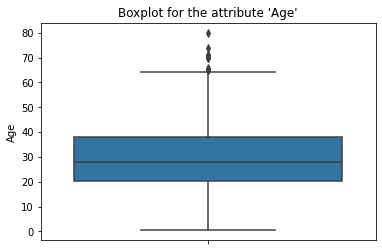

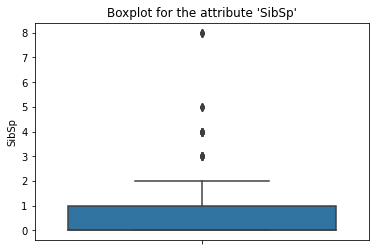

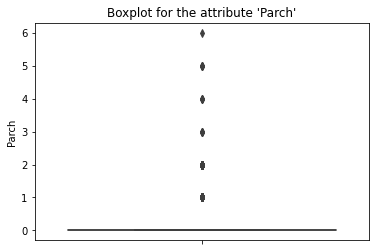

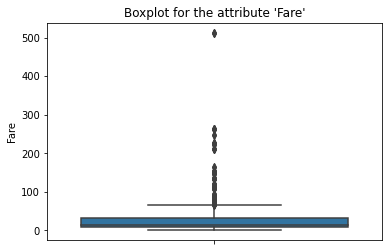

In [12]:
# Plotting the boxplots for numerical variables
# Some boxplots - like the ones with very few numerical unique values are not very useful
for i in numerical_features:
  print('\n')
  plt.figure()
  sns.boxplot(y=df[i]).set(title=f'Boxplot for the attribute \'{i}\'')
  plt.show()

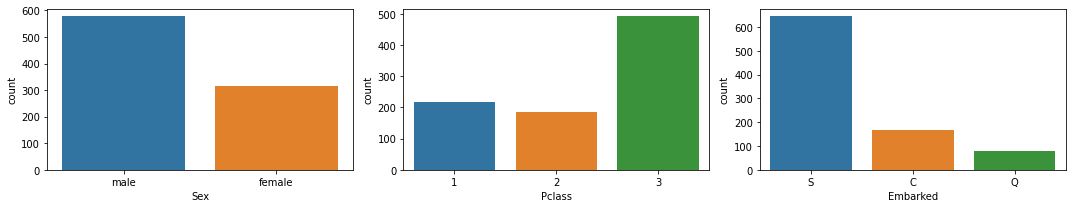

In [13]:
# Plotting the distributions of categorical variables
num_figs_row = 3
plt.figure(figsize=[15, 3*math.ceil(len(categorical_features)/num_figs_row)])

for i in range(len(categorical_features)):
    if df[categorical_features[i]].nunique()<=8:
        plt.subplot(math.ceil(len(categorical_features)/num_figs_row), num_figs_row, i+1)
        sns.countplot(x=df[categorical_features[i]], data=df)
    else:
        plt.subplot(3,1,3)
        sns.countplot(x=df[categorical_features[i]], data=df)
        
plt.tight_layout()
plt.show()


In [14]:
# See if you can predict outliers from here
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp       Parch        Fare
count   891.000000  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean    446.000000    0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std     257.353842    0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min       1.000000    0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%     223.500000    0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%     446.000000    0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%     668.500000    1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max     891.000000    1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


### **EDA3 - Data Cleaning**
#### Also the first step of feature engineering

---

*   Taking care of:
  * Missing Values
  * Outliers
  * Unnecessary rows and columns

#### Taking care of Missing Values

Check the columns that are missing some data

> If % of missing data >=20, maybe drop the column? 

> If categorical, maybe drop or replace with MODE of column - strategize

> If numeric

>> If something like survey, quality etc., drop the rows since you cannot fill those (unethical)

>> Else, check distribution - boxplots and histograms, and decide as to whether carry out the replacement with MEAN or MEDIAN. If there are heavy outliers, then replace with median.

             Total null values  Percentage of total
Cabin                      687            77.104377
Age                        177            19.865320
Embarked                     2             0.224467
PassengerId                  0             0.000000
Survived                     0             0.000000
Pclass                       0             0.000000
Name                         0             0.000000
Sex                          0             0.000000
SibSp                        0             0.000000
Parch                        0             0.000000
Ticket                       0             0.000000
Fare                         0             0.000000




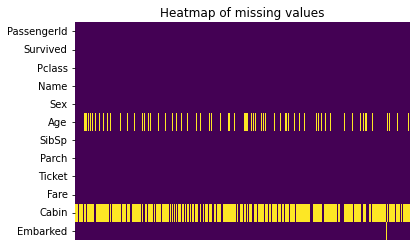

In [15]:
# Printing the NUMBER OF MISSING VALUES and THE PERCENT OF TOTAL that they constitute 
null_vals = df.isnull().sum().sort_values(ascending=False)
percent_null_vals = (null_vals / df.shape[0])*100

df_null_count = pd.concat([null_vals, percent_null_vals], axis=1, keys=['Total null values', 'Percentage of total'])
print(df_null_count)
print('\n')
plt.figure()
sns.heatmap(df.isnull().transpose(), cbar=False, xticklabels=False, cmap = 'viridis').set(title='Heatmap of missing values')
plt.show()

In [16]:
# DROPPING of ENTIRE COLUMNS

drop_cols = ['Cabin']
df.drop(drop_cols, axis=1, inplace=True)
print(df.head())

   PassengerId  Survived  Pclass                                               Name     Sex   Age  SibSp  Parch            Ticket     Fare Embarked
0            1         0       3                            Braund, Mr. Owen Harris    male  22.0      1      0         A/5 21171   7.2500        S
1            2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1      0          PC 17599  71.2833        C
2            3         1       3                             Heikkinen, Miss. Laina  female  26.0      0      0  STON/O2. 3101282   7.9250        S
3            4         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0            113803  53.1000        S
4            5         0       3                           Allen, Mr. William Henry    male  35.0      0      0            373450   8.0500        S


In [17]:
# DROPPING of ROWS with missing values of certain columns

# nr_cols = [COLUMN_NAMES]
# df = df.dropna(subset=nr_cols)
# df = df.reset_index()
# print(f'Number of rows in the original dataset: {dataset.shape[0]}')
# print(f'Number of rows now: {df.shape[0]}')

In [18]:
# CATEGORICAL column values replacement with MODE

mode_cols = ['Embarked']

df[mode_cols] = df[mode_cols].fillna(df[mode_cols].mode().iloc[0])

In [19]:
# NUMERICAL column values replacement with MEAN OR MEDIAN
# Note: Replacing the missgíng values of age with the MEAN is a judgement call here.
# Looking at the histogram of 'Age' column, there are only small outliers present, so the replacement can be either MEAN or MEDIAN
mean_cols = ['Age']
# median_cols = [COLUMN_NAMES]

df[mean_cols] = df[mean_cols].fillna(df[mean_cols].mean())
# df[median_cols] = df.fillna(df[median_cols].median())
print(df.head())

   PassengerId  Survived  Pclass                                               Name     Sex   Age  SibSp  Parch            Ticket     Fare Embarked
0            1         0       3                            Braund, Mr. Owen Harris    male  22.0      1      0         A/5 21171   7.2500        S
1            2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1      0          PC 17599  71.2833        C
2            3         1       3                             Heikkinen, Miss. Laina  female  26.0      0      0  STON/O2. 3101282   7.9250        S
3            4         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0            113803  53.1000        S
4            5         0       3                           Allen, Mr. William Henry    male  35.0      0      0            373450   8.0500        S


#### Taking care of outliers
---
This should only be done when there is a huge amount of data. Since this is not the case here, this step is not carried out.

In [20]:
# Removing outliers - CAREFUL - do so only when good amount of data
# print(f'Number of rows in the original dataset: {dataset.shape[0]}')
# print(f'Number of rows before removing the outliers: {df.shape[0]}')

# outlier_cols = ['area']
# for col in outlier_cols:
#   q1 = df[col].quantile(0.25)
#   q3 = df[col].quantile(0.75)
#   iqr = q3 - q1
#   df = df[df[col] >= q1 - 1.5*iqr]
#   df = df[df[col] <= q3 + 1.5*iqr]
# print(f'Number of rows after removing outliers: {df.shape[0]}')

In [21]:
# New boxplots of the features
# for attr in outlier_cols:
#   print('\n')
#   plt.figure()
#   sns.boxplot(y=df[attr]).set(title=f'Boxplot for the attribute \'{attr}\'')
#   plt.show()

### **EDA4 - Bivariate Analysis**

---

Three types:
1. Numeric-numeric
2. Numeric-categorical
3. Categorical-categorical

#### Numeric-numeric analysis

---

1. Pair plots
2. Correlation matrix

<Figure size 432x288 with 0 Axes>

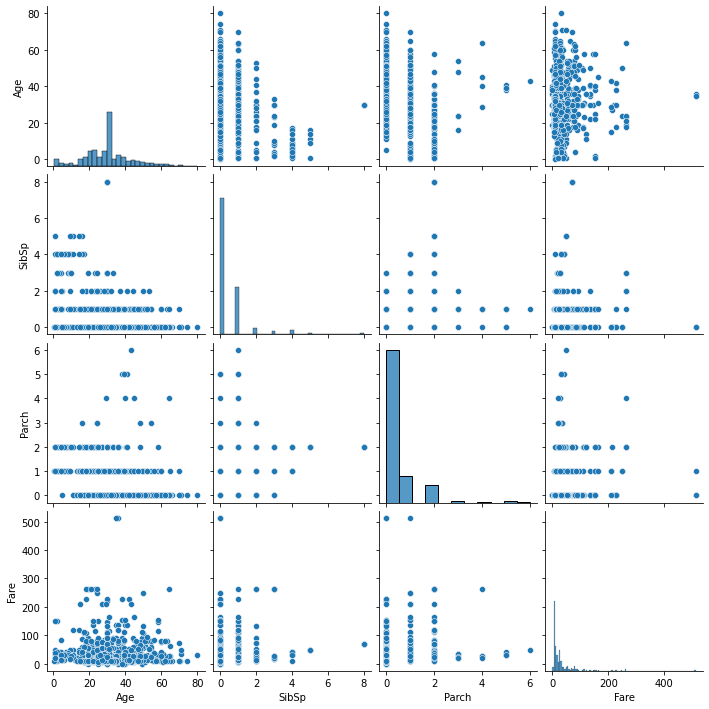

In [22]:
# Pair Plots
plt.figure()
sns.pairplot(data=df, vars=numerical_features) 
plt.show()

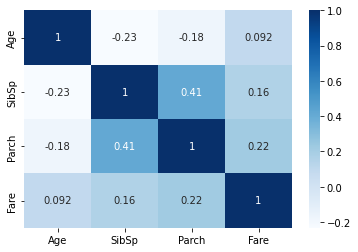

In [23]:
# Correlation heatmap
plt.figure()
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='Blues')
plt.show()

#### Inferences:

The numerical features are not correlated enough for any of them to be dropped. Usually, if there is a high degree of correlation, then decisions regarding dropping of a feature needs to be made.

#### Numeric-categorical analysis

---

1. Grouping categories of one column and checking the groups' central tendencies for the target variable
2. Descriptive stats for the groups in a columns & Box plots - target variables v/s the groups of the column 

##### Grouping categories of one column and checking the groups' central tendencies for the target variable

In [24]:
for i in numerical_features:
  print(f'Mean values of \'{i}\' for the categories of')
  print(df.groupby(target_var)[i].mean())
  print(f'\nMedian values of \'{i}\' for the categories of')
  print(df.groupby(target_var)[i].median())
  print('#############################################\n')

Mean values of 'Age' for the categories of
Survived
0    30.415100
1    28.549778
Name: Age, dtype: float64

Median values of 'Age' for the categories of
Survived
0    29.699118
1    29.699118
Name: Age, dtype: float64
#############################################

Mean values of 'SibSp' for the categories of
Survived
0    0.553734
1    0.473684
Name: SibSp, dtype: float64

Median values of 'SibSp' for the categories of
Survived
0    0.0
1    0.0
Name: SibSp, dtype: float64
#############################################

Mean values of 'Parch' for the categories of
Survived
0    0.329690
1    0.464912
Name: Parch, dtype: float64

Median values of 'Parch' for the categories of
Survived
0    0.0
1    0.0
Name: Parch, dtype: float64
#############################################

Mean values of 'Fare' for the categories of
Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64

Median values of 'Fare' for the categories of
Survived
0    10.5
1    26.0
Name: Fare, dtype: float64
#

##### Descriptive stats for the groups in a columns & Box plots - target variables v/s the groups of the column 

          count       mean        std   min   25%        50%   75%   max
Survived                                                                
0         549.0  30.415100  12.457370  1.00  23.0  29.699118  35.0  74.0
1         342.0  28.549778  13.772498  0.42  21.0  29.699118  35.0  80.0


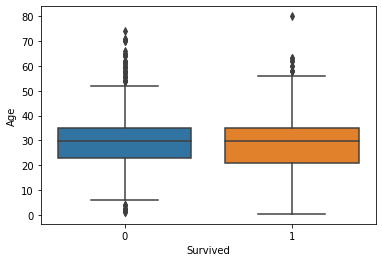



######################################################################################################

          count      mean       std  min  25%  50%  75%  max
Survived                                                    
0         549.0  0.553734  1.288399  0.0  0.0  0.0  1.0  8.0
1         342.0  0.473684  0.708688  0.0  0.0  0.0  1.0  4.0


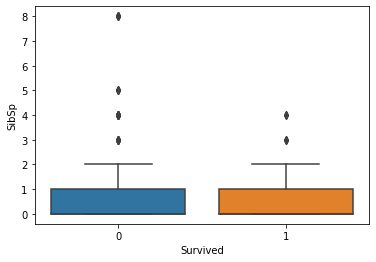



######################################################################################################

          count      mean       std  min  25%  50%  75%  max
Survived                                                    
0         549.0  0.329690  0.823166  0.0  0.0  0.0  0.0  6.0
1         342.0  0.464912  0.771712  0.0  0.0  0.0  1.0  5.0


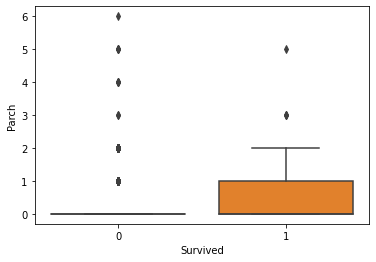



######################################################################################################

          count       mean        std  min      25%   50%   75%       max
Survived                                                                 
0         549.0  22.117887  31.388207  0.0   7.8542  10.5  26.0  263.0000
1         342.0  48.395408  66.596998  0.0  12.4750  26.0  57.0  512.3292


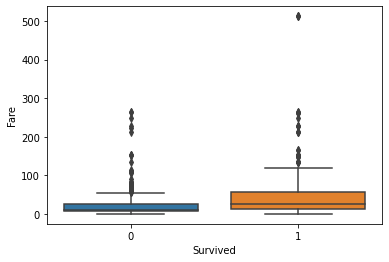



######################################################################################################



In [25]:
for i in numerical_features:
  plt.figure()
  sns.boxplot(y=i, x=target_var, data=df)
  print(df.groupby(target_var)[i].describe())
  plt.show()
  print('\n')
  print('######################################################################################################\n')

#### Inferences:

There are heavy outliers in some of the cases, so to discuss the central tendency, we'll use the median (50 percentile or Quartile 2) for the discussion.

Fig 1: The median age of people who survived and did not survive is the same at around 29.7 years. 

Fig 2: The median number of siblings/spouses both the survivors and non-survivors had was 0.

Fig.3: The median number of parents/children both the survivors and non-survivors had was 0.

Fig.4: The median fare for survivors was 26 whereas for non-survivors it was 10.5.


#### Categorical-categorical analysis

---

Very dependent on the case.  


**Example 1:**   
*Response* (2 categories): yes/no  
*Marital Status* (3 categories): single, married, divorced  
*Loan* (2 categories): yes/no

Say, we want to check the response rate categorized by marital status and loan

Firstly, convert response rate to numerical data type where yes=1 and no=0
```
df['response_rate'] = np.where(data['response']=='yes',1,0)
df['response_rate'].value_counts()

0  39876
1  5285
Name: response_rate, dtype: int64
```
Then, plot the marital status of people with response rate. It shows the mean number of people who responded with 'yes' to the survey categorized by their marital status
```
df.groupby('marital status')['response_rate'].mean().plot.bar()
plt.show()
```
Also, we can plot the mean loan with response rate. It will show what people who have or haven't taken a loan are likely to respond
```
df.groupby('loan')['response_rate'].mean().plot().bar()
plt.show()
```

**Example 2:** Refer to the sample below


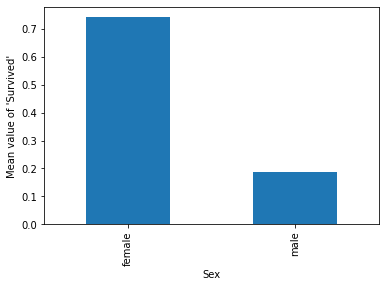

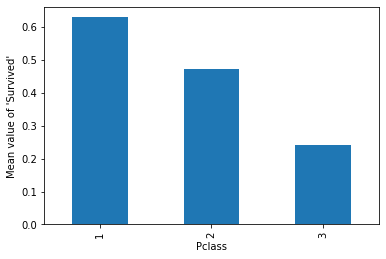

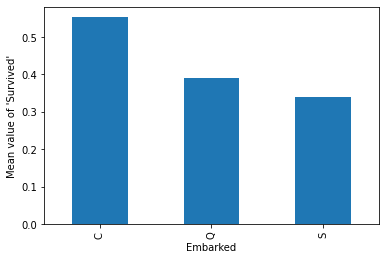

In [26]:
for i in categorical_features:
  df.groupby(i)[target_var].mean().plot.bar()
  plt.ylabel('Mean value of \'Survived\'')
  plt.show()

#### Inferences:

These figures help us infer the *tendency* of survival based on the categorical features.

Fig.1: Females are more likely to survive than the males despite them being fewer in number (refer to the distribution [here](https://colab.research.google.com/drive/1lpAoCAmxmPR4SR5tVrsdTD1q8cx58nnr#scrollTo=0IrdTAsVxoyJ&line=11&uniqifier=1))

Fig 2: The Pclass which is the ticket class can be considered a proxy to the socio-economic status of the passengers. It shows that the likeliness to survive decreases when moving from the Upper (1) to Middle (2) to Lower (3) ticket classes, despite the Lower (3) class being the highest in number (Refer [here](https://colab.research.google.com/drive/1lpAoCAmxmPR4SR5tVrsdTD1q8cx58nnr#scrollTo=0IrdTAsVxoyJ&line=11&uniqifier=1)) 

Fig 3: As per [here](https://colab.research.google.com/drive/1lpAoCAmxmPR4SR5tVrsdTD1q8cx58nnr#scrollTo=0IrdTAsVxoyJ&line=11&uniqifier=1), most number of passengers boarded from S, then C, and then Q. However, the passengers that boarded from C had higher survival chances, and S the lowest.


## **2] Feature Engineering**

---

General Steps:  
1. Start from the cleaned data from EDA -  missing values and outliers are taken care of already
2. Encode categorical data
> 1. Ordinal or Label Encoding  
  2. One-Hot Encoding
  3. Effect Encoding - like OHE but uses -1, 0, 1
  4. Hash Encoding - binary numbers; can fix the #columns
  5. Binary Encoding - looks like hash but like OHE, there's no loss of info.
  6. Base-N Encoding - may get lower dimension than binary but more numbers
3. Splitting the dataset
4. Feature Scaling or Transformation
5. Feature Generation 


### Loading the cleaned data from EDA3

In [27]:
cleaned_dataset = df.copy()
print(cleaned_dataset.head(5))
print('\n')
print(f'Number of rows in the original dataset: {dataset.shape[0]}')
print(f'Number of columns in the original dataset: {dataset.shape[1]}')
print('\n')
print(f'Number of rows in the cleaned dataset: {cleaned_dataset.shape[0]}')
print(f'Number of columns in the cleaned dataset: {cleaned_dataset.shape[1]}')

   PassengerId  Survived  Pclass                                               Name     Sex   Age  SibSp  Parch            Ticket     Fare Embarked
0            1         0       3                            Braund, Mr. Owen Harris    male  22.0      1      0         A/5 21171   7.2500        S
1            2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1      0          PC 17599  71.2833        C
2            3         1       3                             Heikkinen, Miss. Laina  female  26.0      0      0  STON/O2. 3101282   7.9250        S
3            4         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0            113803  53.1000        S
4            5         0       3                           Allen, Mr. William Henry    male  35.0      0      0            373450   8.0500        S


Number of rows in the original dataset: 891
Number of columns in the original dataset: 12


Number of rows in 

### Encoding the categorical data

In [28]:
print('\nThe unique values for the categories are: ')
for i in categorical_features:
  print(f'{i}: {cleaned_dataset[i].unique()}')


The unique values for the categories are: 
Sex: ['male' 'female']
Pclass: [3 1 2]
Embarked: ['S' 'C' 'Q']


#### Ordinal or Label Encoder
---
Used when there is a natural order to the feature. While Pclass has an order, it is already numerical, so this encoding is not required.

In [29]:
# Returns a df with the original columns intact

######## Another way ##########
# def ordinal_mapper(category):
#   """
#   Returns the mapped values
#   """
#   return {'FEATURE1': 1, 'FEATURE2': 2, 'FEATURE3': 3}.get(category, -1)

# encoder = ce.OrdinalEncoder(
#             return_df = True,
#             mapping = [{'col':'COLUMN_NAME', 'mapping': ordinal_mapper}]
#           )
# cleaned_dataset = encoder.fit_transform(cleaned_dataset)
# print(cleaned_dataset.head(5))

#### One-Hot Encoder

In [30]:
######## For 2 values mapping ##########
# def binary_map(x):
#    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
# varlist = [FEATURE LIST]
# cleaned_dataset[varlist] = cleaned_dataset[varlist].apply(binary_map)
# print('\n')
# print(cleaned_dataset.head(5))

########## Another way - dummy variables ##############
# This leaves the original column intact
# status = pd.get_dummies(cleaned_dataset['furnishingstatus'])
# status = pd.get_dummies(cleaned_dataset['furnishingstatus'], drop_first = True) # because the other can be inferred
# cleaned_dataset = pd.concat([cleaned_dataset, status], axis = 1)
# print(cleaned_dataset.head())

######### Another way for OHE more than 2 values ###############
# This leaves the original changed 
varlist = ['Sex', 'Embarked']
encoder = ce.OneHotEncoder(
             cols = varlist,
             return_df = True,
             use_cat_names = True
           )
cleaned_dataset = encoder.fit_transform(cleaned_dataset)
print(cleaned_dataset.head())

   PassengerId  Survived  Pclass                                               Name  Sex_male  Sex_female   Age  SibSp  Parch            Ticket     Fare  Embarked_S  Embarked_C  Embarked_Q
0            1         0       3                            Braund, Mr. Owen Harris         1           0  22.0      1      0         A/5 21171   7.2500           1           0           0
1            2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...         0           1  38.0      1      0          PC 17599  71.2833           0           1           0
2            3         1       3                             Heikkinen, Miss. Laina         0           1  26.0      0      0  STON/O2. 3101282   7.9250           1           0           0
3            4         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)         0           1  35.0      1      0            113803  53.1000           1           0           0
4            5         0       3                       

#### Effect Encoder

In [31]:
# encoder = ce.sum_coding.SumEncoder(
#             cols = [''],
#             verbose = False
#           )
# cleaned_dataset = encoder.fit_transform(cleaned_dataset)
# print(cleaned_dataset.head())

#### Hash Encoder

In [32]:
# encoder = ce.HashEncoder(
#             cols = [''],
#             n_components = #
#           )
# cleaned_dataset = encoder.fit_transform(cleaned_dataset)
# print(cleaned_dataset.head())

#### Binary Encoder

In [33]:
# encoder = ce.BinaryEncoder(
#             cols = [''],
#             return_df = True
#           )
# cleaned_dataset = encoder.fit_transform(cleaned_dataset)
# print(cleaned_dataset.head())

#### Base-N Encoder

In [34]:
# encoder = ce.BaseNEncoder(
#             cols = [''],
#             return_df = True,
#             base = #
#           )
# cleaned_dataset = encoder.fit_transform(cleaned_dataset)
# print(cleaned_dataset.head())

### Dropping features which are useless

---

Features PassengerId, Name, and Ticket are useless in this scenario, and are thus dropped

In [35]:
drop_cols = ['PassengerId', 'Name', 'Ticket']
cleaned_dataset.drop(drop_cols, axis=1, inplace=True)
print(df.head())

   PassengerId  Survived  Pclass                                               Name     Sex   Age  SibSp  Parch            Ticket     Fare Embarked
0            1         0       3                            Braund, Mr. Owen Harris    male  22.0      1      0         A/5 21171   7.2500        S
1            2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1      0          PC 17599  71.2833        C
2            3         1       3                             Heikkinen, Miss. Laina  female  26.0      0      0  STON/O2. 3101282   7.9250        S
3            4         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0            113803  53.1000        S
4            5         0       3                           Allen, Mr. William Henry    male  35.0      0      0            373450   8.0500        S


### Splitting the dataset

---

Done before feature scaling to prevent information leakage from test set to train set.

Here, the data is already split (we're using the train.csv file)

In [36]:
# m=[]
# for i in cleaned_dataset.columns.values:
#     m.append(i.replace(' ','_'))
# cleaned_dataset.columns = m

X = cleaned_dataset.drop(target_var, axis=1)
y = cleaned_dataset[target_var]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train = X
y_train = y

### Feature Scaling or Transformation


In [39]:
sc = StandardScaler()

X_train[numerical_features] = sc.fit_transform(X_train[numerical_features])
# X_test[numerical_features] = sc.transform(X_test[numerical_features])

print(X_train.head())
print('\n')
# print(X_test.head())


   Pclass  Sex_male  Sex_female       Age     SibSp     Parch      Fare  Embarked_S  Embarked_C  Embarked_Q
0       3         1           0 -0.592481  0.432793 -0.473674 -0.502445           1           0           0
1       1         0           1  0.638789  0.432793 -0.473674  0.786845           0           1           0
2       3         0           1 -0.284663 -0.474545 -0.473674 -0.488854           1           0           0
3       1         0           1  0.407926  0.432793 -0.473674  0.420730           1           0           0
4       3         1           0  0.407926 -0.474545 -0.473674 -0.486337           1           0           0




#### Feature Generation

---

Using domain knowledge or analysis, reduce dimensions or generate new features.

In this case, not much can be done, but one example for feature reduction can be Number of Relatives = SibSp + Parch.
